In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch11. 데이터 프레임과 시리즈(Pandas) 1절~8절</font></b>

pip install pandas

# 1. Pandas 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지 
- Numpy를 기반으로 함
- 다른 많은 라이브러리와 잘 통합되도록 설계되어 있음

- 2차원 구조를 갖는 데이터 프레임, 1차원 구조를 갖는 시리즈를 제공

- Pandas의 장점 : 
                 데이터 프레임 생성;
                 파일 입출력;
                 레이블링;
                 부분 데이터 추출;
                 크기 변경(행이나 열 삽입/삭제);
                 데이터 분할/병합;
                 데이터 구조 변경 (long format <--> wide format);
                 결측치 처리

- https://pypi.python.org/pypi/pandas (package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html (API reference)                

In [3]:
import pandas as pd
pd.__version__

'1.5.3'

In [7]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949') # default encoding : utf-8
print(type(data))
display(data)

<class 'pandas.core.frame.DataFrame'>


,Name,Age,Email,Address
0,홍길동,30,hg@hong.com,서울
1,박길동,20,pg@hong.com,부산
2,신길동,25,sg@hong.com,대전


In [9]:
member4 = pd.read_csv('data/ch09_member4.csv') # default encoding : utf-8
member4

,Name,Age,Email,Address
0,신길동,30,sg@hong.com,서울
1,홍길동,20,ho@hong.com,수원
2,마길동,25,ma@hong.com,안양


In [15]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names=['Name', "Age", 'Email', 'Address'])
member1

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2. 데이터 프레임 만들기
## 2.1.딕셔너리 리스트를 이용하여 데이터 프레임 만들기

In [18]:
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}]
df = pd.DataFrame(data=d) # 데이터 프레임은 열만 같은 데이터 타입이면 됨
df

,kor,mat
0,100,95
1,90,99


In [19]:
df.to_dict() # 데이터 프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [21]:
df.to_numpy() # 데이터 프레임을 Numpy 배열로
df.values # 데이터 프레임을 Numpy 배열로 (조금 더 많이 씀)

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [24]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [25]:
df.info() #★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [27]:
df['kor'].dtype

dtype('int64')

In [30]:
# 타입 변경을 열마다 가능
import numpy as np
df['kor'] = df['kor'].astype(np.float64) # kor열의 타임을 float64로

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [35]:
d = [{'kor':100.0, 'mat':95}, {'kor':90, 'mat':99}, {'kor':92, 'eng':99}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100.0,95.0,NaN
1,90.0,99.0,NaN
2,92.0,NaN,99.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      float64
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [34]:
type(np.nan) # 한 열의 한 값이라도 실수일 경우 나머지 정수 타입 데이터들도 다 실수가 됨 

float

In [37]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [39]:
# 결측치는 int로 형 변환 불가(결측치를 대체값으로 치환 후 변환)
# df['mat'] = df['mat'].astype('int32') 에러 발생

## 2.2.리스트를 이용하여 데이터 프레임 만들기

In [40]:
kor = [100,90,95,90,65]
mat = [99,100,95,98,94]
df = pd.DataFrame({'kor':kor, 'mat':mat})
df

,kor,mat
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [41]:
df.head(2) # 상위 2행만 출력

,kor,mat
0,100,99
1,90,100


In [42]:
np.c_[kor,mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  95],
       [ 90,  98],
       [ 65,  94]])

In [45]:
df = pd.DataFrame(data=np.c_[kor,mat], columns=['국어', '수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [47]:
df.shape

(5, 2)

In [50]:
l = [['트렌드 코리아 2026', '김난도', 18000, 10],
     ['사탄탱고', '라슬로', 17820, 10],
     ['미술관 여행자', '카미 유즈노', 29700, 10]]
df = pd.DataFrame(l, columns=['책이름', '저자', '가격', '할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아 2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미 유즈노,29700,10


In [52]:
# %ls : ipython 매직 명령어
# !dir : 셀 명령어

In [60]:
%ls "C:\KI\downloads\shareData\상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 C:\KI\downloads\shareData\상가정보 디렉터리

2025-10-13  오후 03:56    <DIR>          .
2025-10-13  오후 03:56    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장진흥공단

In [66]:
df = pd.read_csv(r'C:\KI\downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv', encoding='utf-8', sep=',', # 기본값(인코딩과 공백) 생략 가능
                 nrows=70) # 상위 70행만
display(df)
df.shape

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11.0,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1.0,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1.0,NaN,126.855046,37.486242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,MA010120220800001555,미래디자인,NaN,M1,과학·기술,M114,인쇄·제품제작,M11401,명함/간판/광고물 제작,C33910,...,1111015500100210002017522,유덕빌딩,서울특별시 종로구 수표로18길 15,110420,3192,NaN,2.0,NaN,126.990424,37.569511
66,MA010120220800001558,화동커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1111014300101380021026977,NaN,서울특별시 종로구 율곡로3길 82,110230,3061,NaN,NaN,NaN,126.982271,37.579313
67,MA010120220800001579,포트폴리오,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73301,...,1111012400100800006017957,석탄회관,서울특별시 종로구 종로5길 58,110727,3151,NaN,1.0,NaN,126.980337,37.572906
68,MA010120220800001312,멋쟁이,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,1111013600100340031013750,NaN,서울특별시 종로구 인사동길 20-14,110290,3163,NaN,NaN,NaN,126.987299,37.572502


(70, 39)

In [67]:
df.head(1) # 상위 1행 출력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [69]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39 # 39열까지 디스플레이 가능 (기본값은 20)
pd.options.display.max_rows = 70 # 70행까지 디스플레이 가능 (기본값은 60)

In [70]:
pd.options.display.max_columns

39

In [71]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [72]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3.read_csv

In [75]:
# help(pd.read_csv)
# pd.read_csv() # 함수 안에서 shift+tab+tab
pd.read_csv?

In [79]:
# (1) csv 파일 불러오기(기본값)
member = pd.read_csv('data/ch11_member.csv',
                     # encoding='utf-8', sep=',', 주석처리 X
                    )
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [81]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [84]:
# 문자형으로 읽어들인 Birth를 datetime형으로 
# 형 변환 : astype('타입'), astype('datetime64')
#          to_datetime()함수
# member['Birth'].astype('datetime64') 업데이트 시 없어질 예정이므로 비추!
member['Birth'] = pd.to_datetime(member['Birth']) # 이것을 parse_dates보다 자주 씀; parse_dates는 결측치 있으면 안됨
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [85]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [87]:
member['Age'] = member['Age'].astype('int16')
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [90]:
# (2) 특정 행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membercp949.csv', encoding='cp949',
                     skiprows=[1,6]) # 1, 6번째 행 제외하고 읽어오기(시작은 1부터) 
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [92]:
# (3) 상위 몇 행만 sep문자가 ,가 아닌 csv 파일 읽어오기 
member = pd.read_csv('data/ch11_membersep.csv',
                    nrows=5, # 상위 5행만
                    sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [93]:
# (4) 주석(#) 제외, datetime형 필드를 지정하여 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv',
                     sep='\t', # 구분자 설정
                    comment='#', # 주석 제외
                    parse_dates=['Birth']) # datetime64형으로 읽어올 필드 지정 
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [94]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## 2.4.패키지에서 가져오기 : iris 데이터
- iris 가져오는 방법1 : sklearn(머신러닝 패키지)
- iris 가져오는 방법2 : statsmodels (R 데이터)
- iris 가져오는 방법3 : seaborn(시각화 패키지)
### 2.4.1. iris 가져오는 방법1 : sklearn
- sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [102]:
from sklearn import datasets # 머신러닝을 공부할 때 필요한 학습 데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리 형식으로 제공
iris = datasets.load_iris()
print(type(iris)) # Bunch타입(딕셔너리를 상속받은 타입) 딕셔너리처럼 동작
# print(iris.DESCR) # iris 데이터셋에 대한 설명
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [103]:
iris.data[:3] # 상위 3행 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [104]:
# 데이터 프레임의 열 이름(공백 때문에 비추! s.u.)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [107]:
# 데이터 프레임의 열 이름(강추!)
[col[:-5].replace(' ', '_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [108]:
iris.target # ML/DL 학습 시의 타겟변수(종속변수)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
iris.target_names # 타겟변수(종속변수)의 이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [110]:
iris.target_names[[iris.target]] # 데이터 프레임에 사용할 타겟변수(맨 오른쪽 열)

array([['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
        'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
  

In [113]:
# 독립변수
data = iris.data
# 타겟(종속)변수
target = iris.target_names[iris.target].reshape(-1, 1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [114]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [117]:
# 1. 독립변수와 종속변수를 stack한 후 데이터 프레임으로
df = pd.DataFrame(np.hstack((data, target)), 
                 columns=iris.feature_names+['species'])
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [118]:
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [121]:
df.columns = [col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [122]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: object

In [124]:
# 2. 독립변수, 종속변수를 따로 데이터 프레임으로 생성 후 두 데이터 프레임을 연결
X = pd.DataFrame(iris.data, columns=[col[:-5].replace(' ', '_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [126]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y.head(1)

,species
0,setosa


In [128]:
print('X의 shape :', X.shape)
print('y의 shape :', y.shape)
print('X의 index :', X.index)
print('y의 index :', y.index)

X의 shape : (150, 4)
y의 shape : (150, 1)
X의 index : RangeIndex(start=0, stop=150, step=1)
y의 index : RangeIndex(start=0, stop=150, step=1)


In [130]:
iris_df = pd.concat([X, y], axis=1) # 두 개의 데이터 프레임을 열로 연결
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.4.2. iris 가져오는 방법2 : statsmodels

In [2]:
# R 패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True) # 기본값은 False. 한 번 다운로드한 데이터를 pc에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
iris = iris_dataset.data
iris.head() # 기본값이 상위 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['Species']
iris.Species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [6]:
iris['Sepal.Length']
# iris.Sepal.Length # 열 이름에 .이 있으면 이 방식으로 접근 불가!

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [7]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [11]:
iris.columns = [col.replace('.', '_').lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3. iris 가져오기 방법3 : seaborn

In [12]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [20]:
# 데이터 프레임을 파일로 출력
iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값
           index=False) # 행 이름이 생략되어 파일 출력

In [21]:
# 압축
iris.to_csv('data/ch11_iris.csv.gz', # 889B
           index=False,
           compression='infer') # 파일 확장자에 맞게 압축

In [23]:
import pandas as pd
# read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3. 이름(열, 행) 지정하기
## 3.1.열 이름 지정하기

In [18]:
import pandas as pd
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [7]:
member.columns

Index(['Name', 'Age', 'Email', 'Address', 'Birth'], dtype='object')

In [19]:
member.columns = ['이름', '나이', '메일', '주소', '생일']
member.head(1)

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 3.2.행 이름 지정하기

In [9]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
member.index = range(11, 16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [20]:
member.index = ['동', '서', '남', '북', '중']
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [12]:
# member['이름']['동'] 비추!
member.loc['동', '이름'] # 행과 열 이름으로 부분 데이터 조회 : loc

'홍길동'

In [13]:
member.loc['북', '주소']

'서울시 관악구'

In [21]:
# index를 이름 열로 (실행 결과가 출력되어 나오면 return만 될 뿐, member는 안 바뀜) 
# member를 수정하려면 (1) 할당, (2) inplace 매개변수에 True를 입력(기본값은 False)
member1= member.set_index('이름')
member1.head(1)

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [22]:
member.set_index('이름', inplace=True)

In [24]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [23]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [26]:
# 인덱스를 다시 컬럼으로 편입
member.reset_index(inplace=True)

In [27]:
member.index = [0, 1, 2, 0, 1]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [31]:
# 기존의 index를 새로운 열에 편입시키지 않고 제거한 후 새로운 숫자 index로 초기화
# member.index = range(len(member))
member.reset_index(drop=True, inplace=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [33]:
# datetime열에서 날짜 및 시간에 관련된 정보를 추출 : 시리즈.dt
member['생일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생일, dtype: int64

In [34]:
member['생일'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64

In [35]:
member['생일'].dt.day

0     1
1     1
2     1
3     1
4    30
Name: 생일, dtype: int64

In [36]:
member['생일'].dt.weekday # 0 : 월요일,..., 6 : 일요일

0    4
1    2
2    0
3    5
4    5
Name: 생일, dtype: int64

## 3.3.레벨 이름 지정하기

In [37]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [40]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [41]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [42]:
member.columns = [['기본정보', '기본정보', '기본정보', '추가정보', '추가정보'],
                  ['이름', '나이', '메일', '주소', '생일']]
member.columns.names = ['대분류', '소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [43]:
member.index = [['좌우', '좌우', '상하', '상하', '상하'],
                ['동', '서', '남', '북', '중']]
member.index.names = ['레벨1', '레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [44]:
member.loc[('상하', '북'), ('기본정보', '이름')]

'홍길북'

In [45]:
member.loc['상하', '기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [46]:
member.loc[('상하','중'), '기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

# 4. 부분 데이터 조회

In [48]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])

In [49]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1.단일 열 조회

In [50]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [51]:
# member[0] # 행 이름으로 []로 조회할 경우 에러 발생!

In [52]:
member[['Name', 'Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2.loc을 이용한 조회
- df.loc[행명, 열명] : 행명, 열명으로 조회


    * 행명과 열명 자리에 슬라이싱이 올 수도 있음 from:to : from부터 to까지(to 포함)
    * 행명과 열명 자리에 리스트가 올 수도 있음

In [55]:
member.loc[0:2] # 모든 열을 출력할 경우 열 생략 가능
member.loc[0:2, :]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [56]:
member.index = ['동', '서', '남', '북', '중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [57]:
member.loc['동':'남', 'Name':'Address']

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [59]:
# 동, 남행, Name, Email, Address열
member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [63]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3.iloc을 이용한 조회¶
- df.iloc[행 순번, 열 순번] : 행 순번, 열 순번으로 조회
    
    
    * 행 순번과 열 순번에 슬라이싱이 올 수도 있음 from:to:by : from부터 to 앞까지(to 미포함)
    * 행 순번과 열 순번 자리에 리스트가 올 수도 있음

In [64]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [65]:
# 동(0)행부터 남행(2)까지 모든 열
member.iloc[0:3]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [67]:
# 동(0)행
member.iloc[0]

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [68]:
# 동행부터 남행까지 Name(0)열부터 Address(3)열까지
member.iloc[0:3, 0:4]
member.iloc[0:3, 0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [72]:
# 짝수번째 행의 마지막 열을 제외하고 출력
member.iloc[::2, :-1]
member.iloc[::2, :4]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [73]:
# 마지막 행부터 처음 행까지 거꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [74]:
# 동행과 남행, Name열, Email(2)열, Address열
member.iloc[[0,2], [0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [77]:
# Name열
member.iloc[..., 1]

동    20
서    30
남    21
북    22
중    23
Name: Age, dtype: int64

## 4.4.조건으로 조회하기

In [78]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [80]:
member['Name']=='홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [83]:
# Name이 홍길남인 행의 모든 열을 출력
member[member['Name']=='홍길남'] # 꺽쇠괄호 안에는 열 이름 또는 조건만 입력 가능
member.loc[member['Name']=='홍길남']
member.loc[[False, False, True, False, False]]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [84]:
# Name이 홍길남인 행의 이름, 나이, Email 
member.loc[member['Name']=='홍길남', 'Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [85]:
# Name이 홍길남인 행의 이름, Email 
member.loc[member['Name']=='홍길남', ['Name','Email']]

,Name,Email
남,홍길남,nam@hong.com


In [87]:
# 23세 이상 모든 열 데이터 조회
member.loc[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [88]:
# 23세 이상의 Name, Age, Email
member.loc[member['Age']>=23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [92]:
# 23세 이상의 Name, Age, Address
member.loc[member['Age']>=23, ['Name', 'Age', 'Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [94]:
# ~ : 반대 
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [96]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부 :', address.startswith('서울시'))
print('중구가 포함되어 있는지 여부 :', address.find('중구')!=-1)

서울시로 시작하는지 여부 : True
중구가 포함되어 있는지 여부 : False


※ 시리즈에 문자함수를 쓰기 위해 참조 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [102]:
# 주소가 서울시로 시작하는 데이터
member.loc[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [104]:
# Address에 중구를 포함하는 데이터(방법1)
member.loc[member.Address.str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [106]:
# Address에 중구를 포함하는 데이터(방법2)
member.loc[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [109]:
# 시리즈.isin([])
# 이름이 홍길동이거나 홍길남은 데이터
member.loc[member['Name'].isin(['홍길동', '홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [110]:
# 이름이 홍길동이거나 홍길남은 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동', '홍길남']), ['Name', 'Address', 'Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [111]:
# 2000년 이전에 태어난 데이터
member.loc[member['Birth'].dt.year < 2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [113]:
member.loc[member['Birth'].dt.month == 1]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## ※ 데이터 프레임의 부분 데이터 조회 방법
1) df[열 이름] : 특정 열 조회
2) df[조건] : 조건에 맞는 모든 행 조회
3) df.loc[행 이름, 열 이름]
    - 행 이름, 열 이름 자리에 슬라이싱, 리스트 올 수 있음
    - 열 이름 생략 시 모든 열
    - 행 이름 자리에 조건 올 수 있음
4) df.iloc[행 순번, 열 순번]
    - 행 순번, 열 순번 자리에 슬라이싱, 리스트 올 수 있음
    - 열 순번 생략 시 모든 열

In [4]:
# 조건 연산자를 이용하여 추출(조건 2개)
import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[np.nan, 80, np.nan, 85],
                     'kor':[100, 80, 60, np.nan]})
display(data)
# 영어 80점 이상이고 한국어 80점 이상인 데이터 추출
data.loc[(data['eng']>=80) & (data['kor']>=80)]

,eng,kor
0,NaN,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
1,80.0,80.0


In [5]:
# 결측치 확인 방법1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [6]:
# 결측치 확인 방법2
data.isna() # 결측치 여부 반환

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [7]:
True + True + False

2

In [8]:
data.isna().sum(axis=0) # 기본값 axis=0 # 각 열의 결측치 개수를 가져올 수 있음  

eng    2
kor    1
dtype: int64

## - 데이터 프레임 조건 추출 QUIZ

In [43]:
with open('data/ch11_데이터프레임조건추출quiz.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
lines

['# 1. sepal_length 열만 출력\n',
 '\n',
 '# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)\n',
 '\n',
 "# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)\n",
 '\n',
 '# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)\n',
 '\n',
 '# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)\n',
 '\n',
 '# 6. species가 versicolor인 데이터의 모든 열\n',
 '\n',
 '# 7. species가 setosa인 데이터 최초 5개 행만 출력\n',
 '\n',
 '# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력\n',
 '\n',
 "# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'\n",
 '\n',
 '# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열\n']

In [10]:
import seaborn as sns
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
# 1. sepal_length 열만 출력
iris.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [18]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.iloc[0:11, 0:4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [44]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.iloc[3:11, [0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [22]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.iloc[0:101:50, ...]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [23]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.iloc[0:126:25, 2:4]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [26]:
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [33]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris.species=='setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length>=6.5].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [36]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length>=7.2, ['sepal_length', 'sepal_width', 'petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [38]:
# 10. versicolor종 중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris.species=='versicolor') & (iris.sepal_length>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [45]:
import numpy as np 

In [47]:
iris[np.logical_and(iris.species=='versicolor', iris.sepal_length>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5. 데이터 삭제 및 추가
## 5.1.데이터 프레임의 요소 삭제
- df.drop(삭제할 열 이름이나 행 이름, axis)
    * axis=0(기본값)일 때는 행 삭제, axis=1일 때는 열 삭제

In [1]:
import pandas as pd
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [2]:
# 1) 단일 행 삭제
member.drop('중', axis=0) # 해당 행 삭제
# 삭제한 결과를 member에 적용 (1)할당
                         # (2)inplace=True

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [3]:
# 2) 복수의 행 삭제
member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [4]:
# 3) 열 삭제
member.drop(['Name','Email'], axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5.2.데이터 프레임의 요소 추가

In [5]:
# 1) 열 추가
member['sex'] = '남'
member

,Name,Age,Email,Address,Birth,sex
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,남
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,남
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,남
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,남
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,남


In [6]:
# 2) 리스트를 이용한 열 추가
member['profession'] = ['교수','회사원', '간호사', '변호사', '예술가']
member

,Name,Age,Email,Address,Birth,sex,profession
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,남,교수
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,남,회사원
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,남,간호사
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,남,변호사
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,남,예술가


In [7]:
# 3) favorite_num 열에 결측치를 할당 후 원하는 데이터로 다시 할당
import numpy as np
member['favorite_num'] = np.nan

In [8]:
member.iloc[0::2, -1] = 7
member

,Name,Age,Email,Address,Birth,sex,profession,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,남,교수,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,남,회사원,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,남,간호사,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,남,변호사,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,남,예술가,7.0


In [17]:
# 4) 행 추가
member.drop(['Email', 'favorite_num', 'profession', 'Birth', 'sex'], axis=1, inplace=True)

In [18]:
new_member = pd.DataFrame([{'Name':'홍길숙', 'Age': 30, 'Address':'서울시 종로구'}])
pd.concat([member, new_member]).reset_index(drop=True) # 두 데이터 프레임 연결

,Name,Age,Address
0,홍길동,20,서울시 강동구
1,홍길서,30,서울시 중구
2,홍길남,21,서울시 강동구
3,홍길북,22,서울시 관악구
4,홍길중,23,부산시 중구
5,홍길숙,30,서울시 종로구


# 6. 데이터 프레임 병합과 연결
## 6.1.merge()를 이용한 데이터 프레임 병합

In [11]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df1.merge(df2) # 내부 join(양쪽이 다 일치하는 데이터만 병합)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [12]:
df1.merge(df2, how='left') # 왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록 함 

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [13]:
df1.merge(df2, how='right') # 오른쪽의 df2 데이터는 모두 남기고 왼쪽 df1가 매칭되도록 함 

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [14]:
df1.merge(df2, how='outer') # 양쪽 df1, df2 데이터 모두 남김 

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


In [16]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df3.merge(df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,10.0
1,b,2.0,b,20.0
2,c,3.0,c,30.0
3,d,4.0,NaN,NaN
4,NaN,NaN,f,40.0


In [19]:
df3.merge(df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


## 6.2.concat()을 이용한 데이터 프레임 연결
- pd.concat([df1, df2, df3,...], axis)
    * axis=0 (기본값) : 위 아래로 연결
    * axis=1 : 좌우로 연결

In [20]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})
pd.concat([df3, df4], axis=1) # 좌우 연결

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [ ]:
pd.concat([df3, df4], axis=1)

In [21]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})
pd.concat([df3, df4]).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7. 정렬(행 이름, 열 이름, 값에 의한 정렬)
- df.sort_index(axis) : 행 이름이나 열 이름으로 정렬
- df.sort_values(by=[정렬 기준이 될 열 이름], ascending=True/False, inplace=True/False) : 특정 열 값에 의한 정렬
## 7.1.행 이름으로 정렬하기

In [3]:
import pandas as pd

In [4]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [5]:
member.sort_index(axis=0, inplace=True) # 기본값은 ascending=True : 오름차순 / ascending=False : 내림차순
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2.열 이름으로 정렬하기

In [6]:
member = member.sort_index(axis=1)
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3.값에 의한 정렬

In [8]:
member.sort_values(by='Age') # Age 기준으로 오름차순 정렬(ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [9]:
member.sort_values(by='Age')['Email']

동    hong@hong.com
남     nam@hong.com
북     buk@hong.com
중     mid@hong.com
서     seo@hong.com
Name: Email, dtype: object

In [35]:
member.sort_values(by='Age', ascending=False) # Age 기준으로 내림차순 정렬

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [36]:
# Age 기준으로 내림차순, Age가 같으면 Email 기준 오름차순 정렬
member.loc[:, 'Age'] = [20,20,30,30,30]
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중


In [38]:
member.sort_values(by=['Age', 'Email'], ascending=[False, True])

,Address,Age,Birth,Email,Name
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남


# 8. 기초 통계 분석
    - Pandas는 기초 통계(데이터 요약), statsmodels : 난이도 있는 통계
- count : NaN을 제외한 데이터 수
- min : 최소값
- max : 최대값
- sum : 합계
- cumsum : 누적합
- cumprod : 누적곱
- mean : 평균
- median : 중위값
- std : 표준편차
- var : 분산
- quantile : 분위수(0사분위수==최소값, 1사분위수(하위 25%), 2사분위수(중위값), 3사분위수(상위 25%), 4사분위수==최대값)
    * 이상치 구하는 용도 : Q1 - 1.5 * IQR(==Q3-Q1) ~ Q3 + 1.5 * IQR 이외의 데이터는 이상치
- describe : 요약 통계량
- corr : 상관 관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터 변동이 많을 때 추세(패턴)를 부드럽게 보고 싶을 때

In [6]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.sample(1) # .head() / .tail()

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,virginica


## 8.1.min, max, median, ...

In [8]:
iris.min() # 열별 최소값(axis=0 -> 기본값)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [9]:
iris.median(numeric_only=True) # iris에서 숫자 필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [12]:
iris_stat = iris.iloc[...,:-1]
iris_stat
iris_stat.mean(axis=0) # 열별 평균 == 행들의 평균(axis=0 혹은 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [13]:
iris_stat.mean(axis=1)
iris_stat.mean(axis='columns') # 행별 평균 == 행을 고정하고 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [18]:
import pandas as pd
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 값
df['value'].quantile(q=[0, 0.3, 0.55, 0.8, 1], interpolation='nearest')

0.00     1
0.30     3
0.55     4
0.80     7
1.00    10
Name: value, dtype: int64

In [17]:
# interpolation='midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.8, 1], interpolation='midpoint')

0.00     1.0
0.30     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [19]:
iris_stat.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [24]:
qunt = iris_stat.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
for i, col in enumerate(qunt.columns):
    min = qunt.iloc[0, i]
    Q1 = qunt.iloc[1, i]
    Q3 = qunt.iloc[3, i]
    max = qunt.iloc[4, i]
    iqr = Q3 - Q1
    lower_outlier = Q1 - 1.5 * iqr # 하한 이상치 limit
    upper_outlier = Q3 + 1.5 * iqr # 상한 이상치 limit
    print(f'{i}번째 : {col} :', end='')
    print('하한 이상치 유무 : {}, 상한 이상치 유무 : {}'.format(min < lower_outlier, max > upper_outlier))

0번째 : sepal_length :하한 이상치 유무 : False, 상한 이상치 유무 : False
1번째 : sepal_width :하한 이상치 유무 : True, 상한 이상치 유무 : True
2번째 : petal_length :하한 이상치 유무 : False, 상한 이상치 유무 : False
3번째 : petal_width :하한 이상치 유무 : False, 상한 이상치 유무 : False


<Axes: >

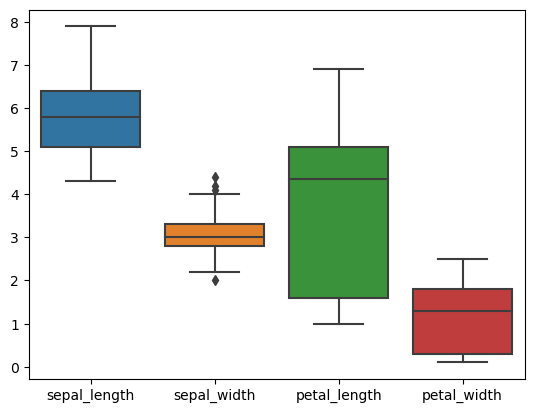

In [25]:
# 상자수염그림(boxplot) - 12장 교안 21쪽
import seaborn as sns
sns.boxplot(data=iris)

In [26]:
iris['sepal_length'].rolling(5).mean() # 인접한 5개의 평균

0       NaN
1       NaN
2       NaN
3       NaN
4      4.86
       ... 
145    6.58
146    6.46
147    6.60
148    6.48
149    6.32
Name: sepal_length, Length: 150, dtype: float64

## 8.2.요약 통계량
- describe()
- ggf. 매개변수 include/exclude

In [27]:
# 1) 기본 요약 통계량
iris.describe() # 기본값 : 숫자열에서의 요약 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
iris['species'].describe()
iris.species.describe() # 문자열에서의 요약 통계량 : 데이터 개수(count), 종류(unique), 최빈 데이터(top), 최빈 데이터 개수(freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [40]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                   'b':[2.1,4]*3,
                   'c':['aaa', 'aaa', 'bbb', 'ccc', 'ddd', 'eee'],
                   'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [41]:
df.describe() # 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [48]:
# include 매개변수를 통해서 요약 통계량을 출력할 타입 지정
df.describe(include=['float64', 'bool', 'object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [44]:
# 모든 타입의 열의 요약 통계량 출력
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [45]:
# exclude 매개변수를 이용하여 기본 통계량 출력에서 제외할 타입을 지정
df.describe(exclude=['float'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [46]:
df['c'].unique() # 특정 열의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [47]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3.공분산/상관계수

In [51]:
# 공분산 : (x1 - x1의 평균) * (x2 - x2의 평균)들의 합을 n-1로 나눈 값 : 범위가 따로 없음
iris_stat.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [53]:
# -1(반비례) <= 상관계수(공분산/(x1의 표준편차 * x2의 표준편차)) =< 1(정비례)
# 상관계수가 0이면 상관 관계 없음
iris_stat.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


12장 교안 21쪽
- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

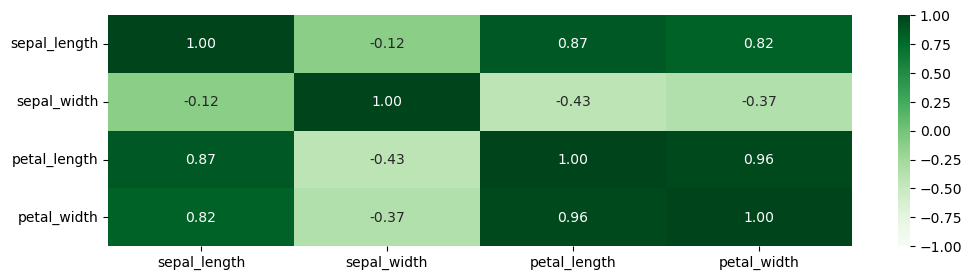

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 3))
sns.heatmap(iris_stat.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()